# Deep Learning Practice
Create neural network to recognize MNIST handwritten digits

In [3]:
# Import Required Libraries
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

In [12]:
# Load Dataset
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

print('X_train shape: ',X_train.shape)
print('Y_train shape: ',y_train.shape)
print('X_valid shape: ',X_valid.shape)
print('Y_valid shape: ',y_valid.shape)

X_train shape:  (60000, 28, 28)
Y_train shape:  (60000,)
X_valid shape:  (10000, 28, 28)
Y_valid shape:  (10000,)


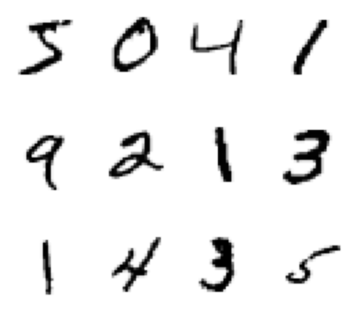

In [15]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3,4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

## Preprocessing

In [24]:
# Reshape the X matrices into arrays for the neural network model input
X_train = X_train.reshape(60000, 28*28).astype('float32')
X_valid = X_valid.reshape(10000, 28*28).astype('float32')

In [25]:
# Standardize pixel intensity values of 0 - 255 into 0 - 1
X_train /= 255
X_valid /= 255

In [26]:
# We must one-hot encode the label (y) vectors
n_classes = 10
y_train = keras.utils.to_categorical(y_train,n_classes)
y_valid = keras.utils.to_categorical(y_valid,n_classes)

In [31]:
# Example row of one-hot matrix
y_train[0] # This should show a "1" on the sixth column, representing the value of 5.

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Build the Neural Network Architecture

In [52]:
model = Sequential()
model.add(Dense(64,  activation = 'sigmoid', input_shape = (784,)))
model.add(Dense(10, activation = 'softmax'))

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Train the Neural Network

In [55]:
history = model.fit(X_train,y_train,
    batch_size=128, epochs = 100, # Each epoch is a run through the 60000 images in the training dataset
    verbose = 1, # show additional feedback during training
    validation_data = (X_valid, y_valid)) # allows evaluating of performance

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.7403 - acc: 0.8349 - val_loss: 0.3617 - val_acc: 0.9093
Epoch 2/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.3156 - acc: 0.9153 - val_loss: 0.2671 - val_acc: 0.9264
Epoch 3/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.2491 - acc: 0.9304 - val_loss: 0.2251 - val_acc: 0.9352
Epoch 4/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.2129 - acc: 0.9399 - val_loss: 0.2002 - val_acc: 0.9406
Epoch 5/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.1876 - acc: 0.9471 - val_loss: 0.1775 - val_acc: 0.9490
Epoch 6/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.1679 - acc: 0.9523 - val_loss: 0.1645 - val_acc: 0.9533
Epoch 7/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.1521 - acc: 0.9568 - val_loss: 0.1525 - 

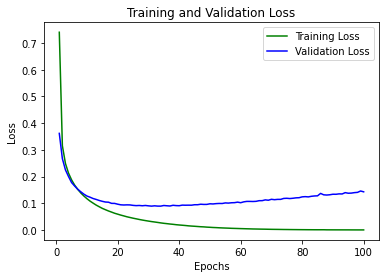

In [76]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

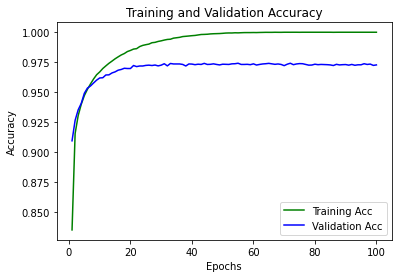

In [79]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
epochs = range(1,101)
plt.plot(epochs, accuracy, 'g', label='Training Acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()